In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import optimize, spatial
import os
import urllib

import frigidum

from frigidum.examples import tsp



In [2]:
eps = 0.0001
np.random.seed(42)

delta = np.random.rand(1001)

def produce_function(x):
    return 1 / (x**2 - 3*x + 2)

x = np.linspace(0, 3, 1001)
y = np.zeros(1001)
for i, xi in enumerate(x):
    f_x = produce_function(xi)
    if f_x < -100:
        y[i] = -100 + delta[i]
    elif -100 <= f_x <= 100:
        y[i] = f_x + delta[i]
    else:
        y[i] = 100 + delta[i]

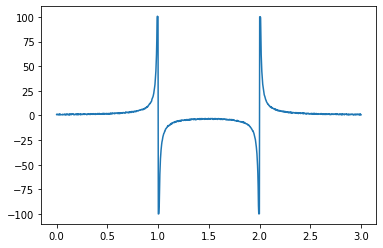

In [3]:
plt.plot(x, y)

In [4]:
def rational_function(x, a, b, c, d):
    return (a*x + b) / (x**2 + c * x + d)

def cost_func_vect(params, gt, x):
    a, b, c, d = params

    value = (gt - rational_function(x, a, b, c, d))
    return value

def cost_func(params, gt, x):
    a, b, c, d = params

    value = sum((gt - rational_function(x, a, b, c, d))**2)
    return value

Levenberg Markquardt: solution [-1.00332195  1.0037803  -2.00077302  1.00078926], # function evaluations 168
Nelder Mead: solution [-0.01639876  0.01404812 -2.01994314  1.02006443], # function evaluations 548, # iters 318
Annealing: solution [-1.00081456  1.00129925 -2.00087953  1.00089564], # function evaluations 8826, # iters 1000
Differential evolution: solution [-1.00187097  1.00235732 -2.00088908  1.00090523], # function evaluations 8565, # iters 140


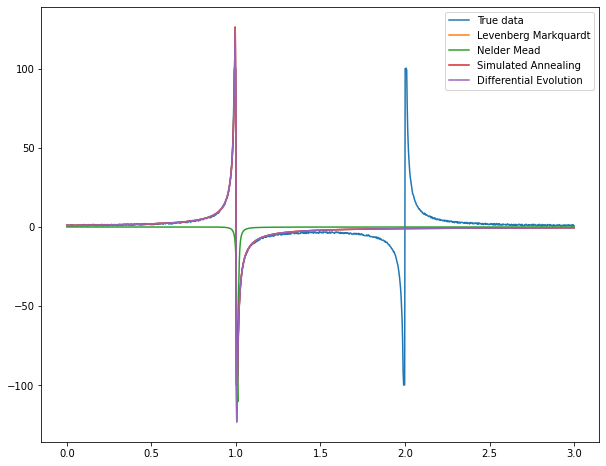

In [15]:
params_lm = optimize.least_squares(cost_func_vect, [1, 0, 1, 1], args=(y, x), method='lm', ftol=eps)
print(f'Levenberg Markquardt: solution {params_lm.x}, # function evaluations {params_lm.nfev}')
params_nm= optimize.minimize(cost_func, [1, 0, 1, 1], args=(y, x), method='Nelder-Mead', tol=eps)
print(f'Nelder Mead: solution {params_nm.x}, # function evaluations {params_nm.nfev}, # iters {params_nm.nit}')
params_anneal = optimize.dual_annealing(cost_func, ((-5, 5), (-5, 5), (-5, 5), (-5, 5)), args=(y, x))
print(f'Annealing: solution {params_anneal.x}, # function evaluations {params_anneal.nfev}, # iters {params_anneal.nit}')

params_evol = optimize.differential_evolution(cost_func, ((-5, 5), (-5, 5), (-5, 5), (-5, 5)), args=(y, x), tol=eps)
print(f'Differential evolution: solution {params_evol.x}, # function evaluations {params_evol.nfev}, # iters {params_evol.nit}')

plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.plot(x, rational_function(x, *params_lm.x))
plt.plot(x, rational_function(x, *params_nm.x))
plt.plot(x, rational_function(x, *params_anneal.x))
plt.plot(x, rational_function(x, *params_evol.x))
plt.legend(['True data', 'Levenberg Markquardt', 'Nelder Mead', 'Simulated Annealing', 'Differential Evolution'])


In [8]:
cities_filename = 'pcb442.tsp'
cities_link = 'http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/pcb442.tsp'

if not os.path.exists(cities_filename):
    urllib.request.urlretrieve(cities_link, cities_filename)

with open(cities_filename) as input_file:
    data = input_file.readlines()[6:-1]
data = [line.strip() for line in data]
data = [[line.split(' ')[1].strip(), line.split(' ')[2].strip()] for line in data]
data = np.array(data, dtype=float)
dist_matrix = spatial.distance.squareform(spatial.distance.pdist(data))





Text(0, 0.5, 'y')

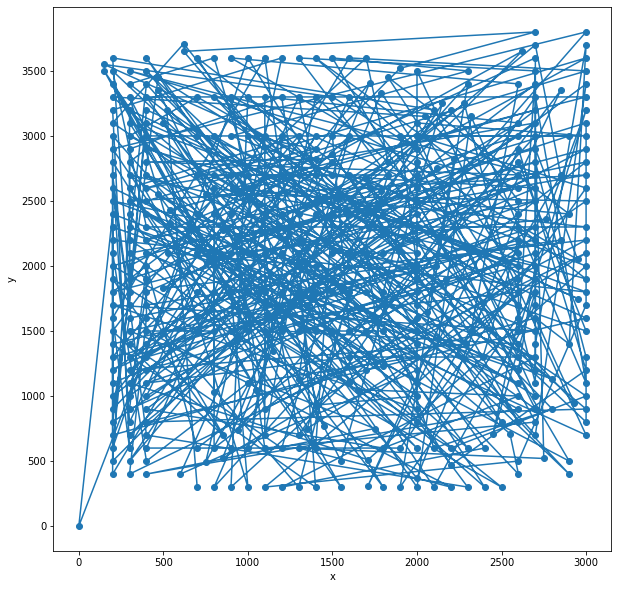

In [9]:
def rand_start():
    random_guess = np.arange(0, data.shape[0])
    np.random.seed(42)
    np.random.shuffle(random_guess)
    return random_guess
initial_guess = rand_start()
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][initial_guess], data[:, 1][initial_guess], )
plt.plot(data[:, 0][initial_guess], data[:, 1][initial_guess], )
plt.xlabel('x')
plt.ylabel('y')

In [10]:


local_opt = frigidum.sa(random_start=rand_start,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=10**5,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing=None)


T: 0.001, M: 0.00, O_min: 52841.7426, O_current: 52841.7426: 100%|██████████| 221/221 [03:28<00:00,  1.06cooling/s]

---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.216406
   euclidian_nuke_and_fix           : 0.259210
   route_bomb_and_fix               : 0.252349
   route_nuke_and_fix               : 0.259776
   random_disconnect_vertices_and_  : 0.135510
---
(Local) Minimum Objective Value Found: 
   52841.74259318


solution: [218 208 197 182 169 158 146 133 123 111 435 100  92  91  90  89  88  87
 377 381 380 108 119 130 142 155 166 393 394 178 397 177 165 154 153 140
 128 117 106 105 104 116 127 138 139 163 164 176 188 396 199 212 221 229
 246 245 244 243 242 241 240 239 234 227 405 400 406 402 210 220 228 211
 187 175 162 152 392 174 186 398 395 173 185 172 161 150 149 136 126 385
 440 103 114 386 388 151 391 137 115  71  39  40  72  73  41   8   7   6
   5  38  70  69  68  36  37   4   3   2  35  67  66  65  33  34   1   0
 441 101 102 113 125 135 148 160 171 184 399 404 226 233 238 237 265 268
 272 275 278 280 281 269 266 270 273 276 425 279 439 282 283 309 338 308
 307 427 340 341 345 346 347 432 348 349 350 351 342 352 353 354 433 355
 356 357 434 358 359 360 343 361 362 363 364 430 326 301 302 327 328 329
 344 365 366 367 368 369 431 370 371 372 373 374 337 336 426 335 334 333
 306 332 331 330 305 304 303 421 418 260 259 258 257 256 255 254 253 252
 417 416 277 295 296 322 323 297 298 299 

Text(0, 0.5, 'y')

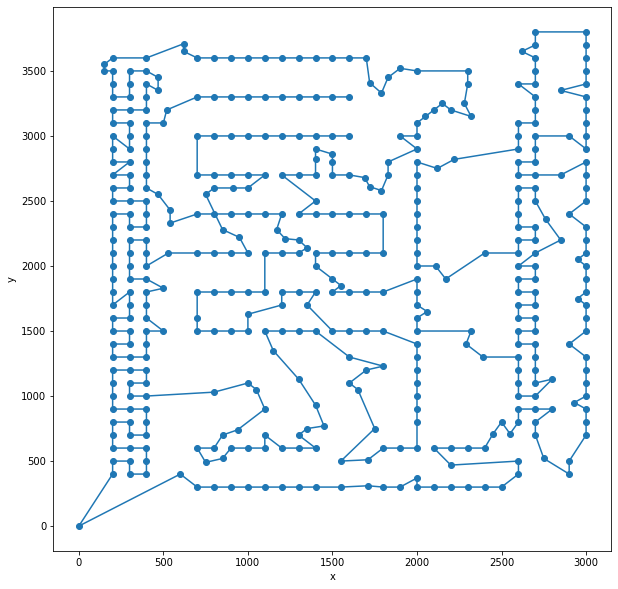

In [12]:
print('solution:', local_opt[0])
print('min temperature:', local_opt[1])
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][local_opt[0]], data[:, 1][local_opt[0]])
plt.plot(data[:, 0][local_opt[0]], data[:, 1][local_opt[0]])
plt.xlabel('x')
plt.ylabel('y')
